# HuggingFace 커스텀 프로젝트 만들기 [프로젝트]

## 결론 

1. 모델을 정상적으로 불러오고 전처리까지 마침
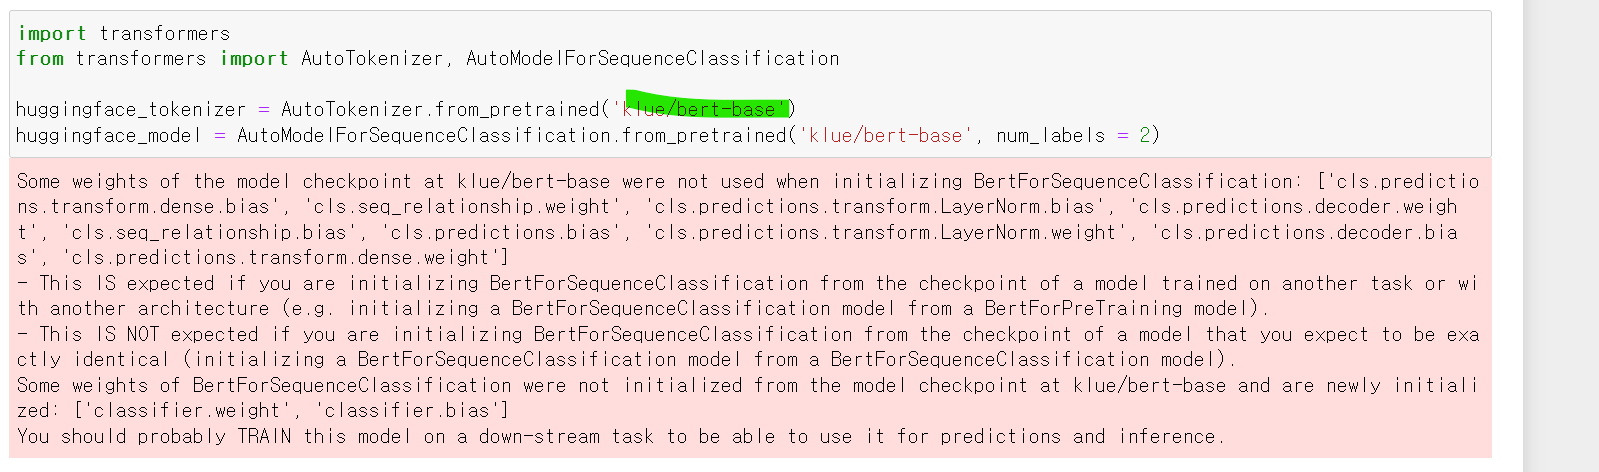

2. Preprocess를진행하고 전체 파라미터 튜닝 및 몇개의 레이어를 얼리고 학습을 진행함
- 정확도는 84% 정도를 기록 (아래 첨부)

3. 버케팅과 동적 패딩을 사용해봤지만 학습속도나 정확도 부분에서 차이가없었다
- 일단 데이터 개수가 많아서 길이별로 처리를 해서 진행했기때문에 패딩길이의 차이가 없었다
- 데이터 개수를 줄여서 해서 성능의 차이가 많이 나지않았다.

## 회고
- 생각보다 시간이 오래걸리는 학습에 당황했다. 
- 학습시간동안 무엇을 해야하는지 갈팡질팡한 느낌 
- 학습을 시작하기전에 어떤방법으로 실험을 진행할지 생각을 하고하지않으면 시간을 생각보다 많이 낭비하는 느낌이들었다. 
- 학습을 돌리는것보다 방향설정을 잘 해보자


### 학습 진행 1 
- 처리를 위해서 최소한의 처리만 진행하고 데이터 전체를 학습을 진행했다
- 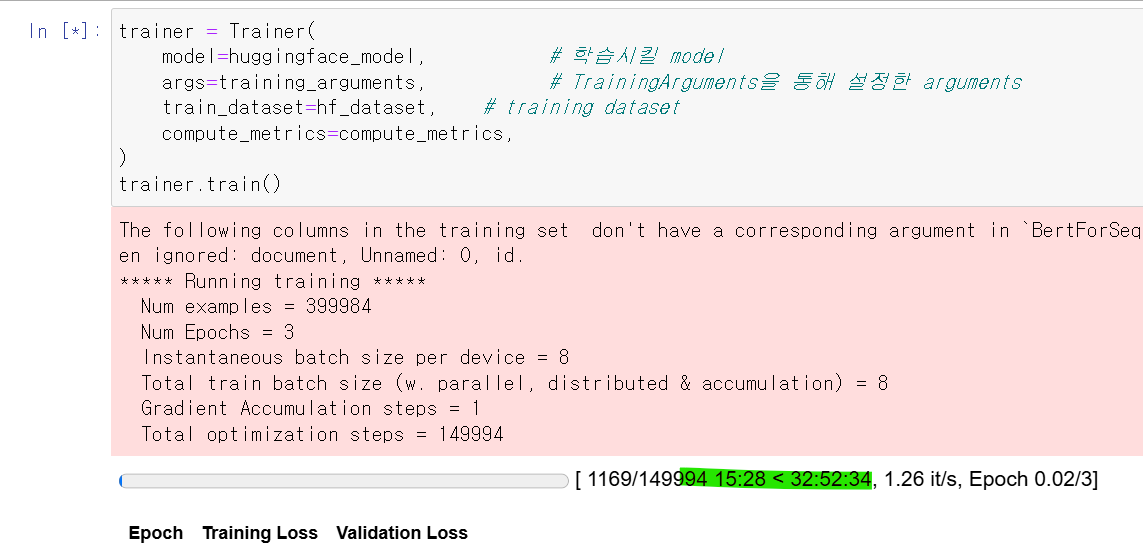

- 그결과.. 전체 처리 예상 시간이 32시간이 찍혀버렸다. 
- 사실 기다려도 되겠지만.. 데이터가 너무 많아서 그런건 아닐까? 하는 생각이 들었다
- 일단 다른 방법은 예상 시간이 어떻게 찍히나 보고 결정해야겠다

- 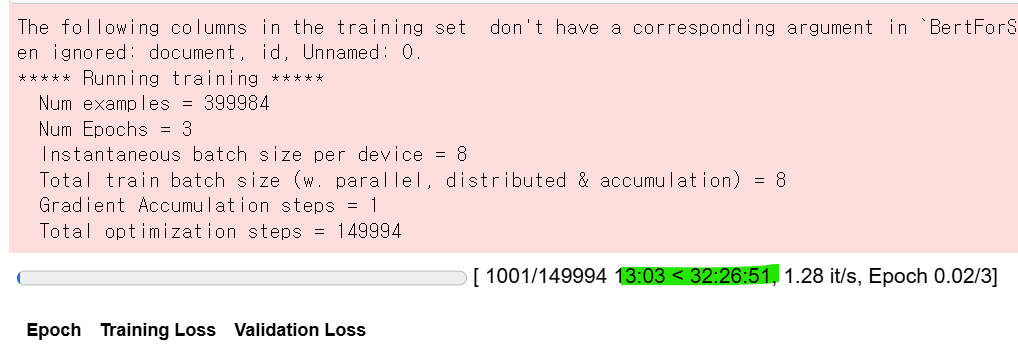
- 마찬가지로 32시간이 찍힌다 

### 데이터개수를 4만개로 줄였다
- 당연한 이야기지만 학습시간이 3시간으로 줄었다 야호! 하지만 이것도 너무 길다


### 데이터를 5000개로 줄였다. (val - 100개, test 500개) - 'group-by-length' = true
- 일단 이정도 데이터를 가지고 어느정도 성능이 나오는지 궁금했다.
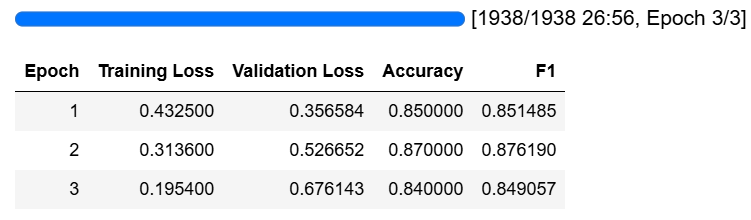
- 학습결과
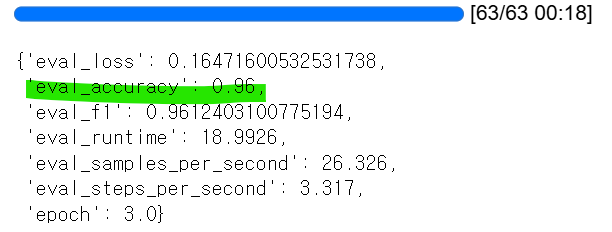
- 오잉 학습이 잘 안됬다고 생각했는데 생각보다 정확도가 96%로 높다! 
- **valdata셋이랑 test랑 겹치는 부분이있어서 이런 부분이 생긴것같다!**
- 실험 다시해야될듯하다

#### 다시 고치고 진행했을 때 
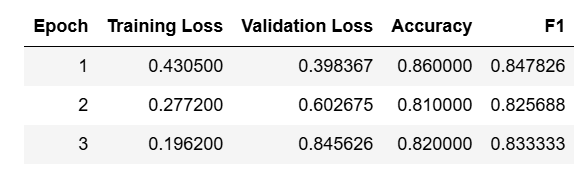
- 정확도가 정당히 고쳐진것을 확인할수있다
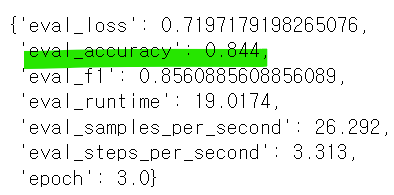


## 추가실험 - 레이어를 얼리고 파인튜닝 진행
- 이때 임베딩 레이어를 얼리는게 좋을지
- 안얼리는게 좋을지 고민이된다
- 얼리고 진행하니 생각보다 성능이 안나옴

# 데이터 처리
- 허깅페이스에서 다운로드 받은 데이터
- 결측치를 제거하기위해서 pandas dataframe으로 변경
- 다시 허깅페이스 dataset으로 변경.. 

In [8]:
# 허깅페이스에서 데이터를 다운로드
import datasets
from datasets import load_dataset

huggingface_nsmc_dataset = load_dataset('Blpeng/nsmc')
print(huggingface_nsmc_dataset)

Using custom data configuration Blpeng___nsmc-55757a98c8abea78
Reusing dataset csv (/aiffel/.cache/huggingface/datasets/csv/Blpeng___nsmc-55757a98c8abea78/0.0.0/bf68a4c4aefa545d0712b2fcbb1b327f905bbe2f6425fbc5e8c25234acb9e14a)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'id', 'document', 'label'],
        num_rows: 400000
    })
})


In [9]:
train = huggingface_nsmc_dataset['train']
train

Dataset({
    features: ['Unnamed: 0', 'id', 'document', 'label'],
    num_rows: 400000
})

# 데이터 전처리
- 결측치 제거
- 중복값 제거

### 어떻게 중요한것만 남기고 데이터를 줄일수있을까?
- 일단 학습결과를 비교하기위해서 데이터 개수를 임의로 줄이는게 맞을까?
- 그렇다면 길이 말고 또 줄일수있는 방법이있는가?
    - 막 줄였는데 label분포가 편향되면 어쩌지? - 확인결과 괜춘
    - 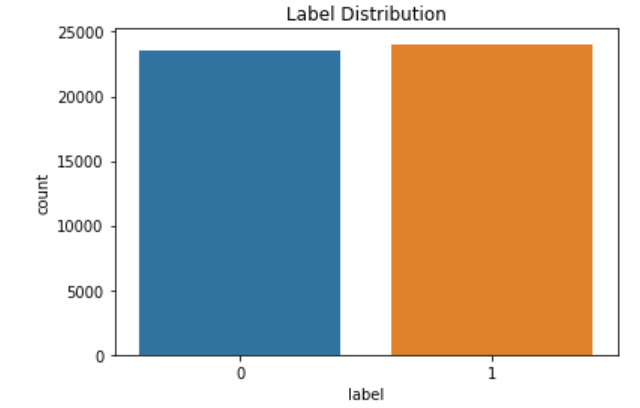
    
  

In [10]:
import pandas as pd
from datasets import Dataset

# train 데이터를 Dataset 형식으로 불러온 경우
train_df = train.to_pandas()  # Dataset을 DataFrame으로 변환

# NaN 값 제거
train_cleaned = train_df.dropna()
train_cleaned = train_cleaned.drop_duplicates(subset=['document'])
train_cleaned

,Unnamed: 0,id,document,label
0,0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
...,...,...,...,...
398860,148860,3575175,"""흥순아, 용케 """"가문의 영광""""은 잘만들었다?""",0
398875,148875,7949043,"""0점은 못주네 ㅋ 성유리 """"아 불결해""""라고 일침 ㅋ""",0
399506,149506,6755401,"""""""한국의 공격은 미국본토의 공격과 같은 것으로 간주한다."""" 이게 얼마나 중요한...",0
399727,149727,2931045,"""""""당신의 꿈은 물 위의 사막같은 거에요."""" 크아~!""",1


In [11]:
min_length_sen = 15
max_length_sen = 17

filtered_df = train_cleaned[(train_cleaned['document'].str.len() > min_length_sen) &
                            (train_cleaned['document'].str.len() < max_length_sen)]

filtered_df

,Unnamed: 0,id,document,label
6,6,9279041,완전 감동입니다 다시봐도 감동,1
24,24,9694764,중세시대명작. 굿 평점이왜이래,1
34,34,8906022,굿굿굿 또해라또해라 제발 ㅠㅠ,1
52,52,3454102,탱고 음악의 감동이 밀려온다.,1
57,57,10151722,잔잔하고 재미도 있어서 좋았다,1
...,...,...,...,...
199858,199858,4824575,누구도 감당할 수 없는 지루함,0
199877,199877,7760941,당시 연예계 수준을 알만한영화,0
199958,199958,10005318,노 ㅡ 답. 정말 재미없었다.,0
247150,47150,9740867,"""""""난 널 사랑해...""""""",1


In [12]:
# 무작위 500개 데이터를 test 데이터 프레임으로 저장
print(len(filtered_df))
val_df = filtered_df.sample(100, random_state=42)  # random_state로 재현성 확보 가능
train_df = filtered_df.drop(val_df.index)

print(len(train_df))

test_df = train_df.sample(500, random_state=42)  # random_state로 재현성 확보 가능
# 나머지 데이터를 새로운 train_cleaned 데이터프레임으로 저장
train_df = train_df.drop(test_df.index)

print(len(train_df))


5267
5167
4667


In [14]:
# Tensorflow dataset 구조를 python dict 형식으로 변경

# dataframe 데이터를 dict 내부에 list로 변경
train_dataset = train_df.to_dict('list')
val_dataset = val_df.to_dict('list')
test_dataset = test_df.to_dict('list')

# # Huggingface dataset
tf_train_dataset = Dataset.from_dict(train_dataset)
tf_val_dataset = Dataset.from_dict(val_dataset)
tf_test_dataset = Dataset.from_dict(test_dataset)

In [15]:
tf_train_dataset

Dataset({
    features: ['Unnamed: 0', 'id', 'document', 'label'],
    num_rows: 4667
})

In [16]:
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification

huggingface_tokenizer = AutoTokenizer.from_pretrained('klue/bert-base')
huggingface_model = AutoModelForSequenceClassification.from_pretrained('klue/bert-base', num_labels = 2)

Some weights of the model checkpoint at klue/bert-base were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized

In [17]:
def transform(data):
    return huggingface_tokenizer(
        data['document'],
        truncation = True,
        padding = 'max_length',
        return_token_type_ids = False,
        )

In [18]:
hf_train_dataset = tf_train_dataset.map(transform, batched=True)
hf_eval_dataset = tf_val_dataset.map(transform, batched=True)
hf_test_dataset = tf_test_dataset.map(transform, batched=True)

  0%|          | 0/5 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

In [19]:
hf_eval_dataset

Dataset({
    features: ['Unnamed: 0', 'attention_mask', 'document', 'id', 'input_ids', 'label'],
    num_rows: 100
})

In [20]:
# hf_train_dataset = hf_train_dataset.rename_column("label", "labels")
hf_train_dataset.set_format("torch")

# hf_eval_dataset = hf_eval_dataset.rename_column("label", "labels")
hf_eval_dataset.set_format("torch")

# train_dataset = tokenized_datasets["train"]
# test_dataset = tokenized_datasets["test"]

In [21]:
hf_eval_dataset

Dataset({
    features: ['Unnamed: 0', 'attention_mask', 'document', 'id', 'input_ids', 'label'],
    num_rows: 100
})

In [22]:
import os
import numpy as np
from transformers import Trainer, TrainingArguments

output_dir = os.getenv('HOME')+'/aiffel/transformers'

training_arguments_dbs = TrainingArguments(
    output_dir,                       
    evaluation_strategy="epoch",         
    learning_rate = 2e-5,          
    per_device_train_batch_size = 8,
    per_device_eval_batch_size = 8,
    num_train_epochs = 3,
    weight_decay = 0.01,
    group_by_length=False,
)

In [ ]:
training_arguments_dbs = TrainingArguments(
    output_dir,                       
    evaluation_strategy="epoch",         
    learning_rate = 2e-5,          
    per_device_train_batch_size = 8,
    per_device_eval_batch_size = 8,
    num_train_epochs = 3,
    weight_decay = 0.01,
    group_by_length=False,
)

In [ ]:
# from datasets import load_metric
# metric = load_metric('glue', 'mrpc')

# def compute_metrics(eval_pred):    
#     predictions,labels = eval_pred
#     predictions = np.argmax(predictions, axis=1)
#     return metric.compute(predictions=predictions, references = labels)

In [23]:
trainer = Trainer(
    model=huggingface_model,           # 학습시킬 model
    args=training_arguments_dbs,           # TrainingArguments을 통해 설정한 arguments
    train_dataset= hf_train_dataset,
    eval_dataset = hf_eval_dataset, # training dataset
#     compute_metrics=compute_metrics,
)
trainer.train()

The following columns in the training set  don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: Unnamed: 0, document, id.
***** Running training *****
  Num examples = 4667
  Num Epochs = 3
  Instantaneous batch size per device = 8
  Total train batch size (w. parallel, distributed & accumulation) = 8
  Gradient Accumulation steps = 1
  Total optimization steps = 1752


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 

In [ ]:
trainer.evaluate(hf_test_dataset)

In [ ]:
del huggingface_model

In [ ]:
# 1. 모델과 토크나이저 로드
model_name = "klue/bert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)

In [ ]:
# 2. NSMC 데이터셋 로드
dataset = load_dataset("nsmc")

In [ ]:
dataset['train']

In [ ]:
def tokenize_function(examples):
    return tokenizer(examples["document"], padding="max_length", truncation=True, max_length=128)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

In [ ]:
# 4. PyTorch 데이터셋으로 변환
# tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format("torch")

train_dataset = tokenized_datasets["train"]
test_dataset = tokenized_datasets["test"]

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
)

In [ ]:
# 6. Trainer 객체 생성
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

In [ ]:
# 7. 모델 학습
trainer.train()